In [1]:
#First Implementation with Boosted Decision Tree
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Data is stored in pandas -> Each 

In [68]:
data=pd.read_csv('data/Total_ML_Training_data.csv',header=[0,1])
valid=pd.read_csv('data/Total_Valid_data.csv')

In [40]:
data.head()

j1p4                                    j2p4                      \
         pt       phi       eta       mass       pt       phi       eta   
0  122.6875 -2.919922  0.445801  12.101562  87.8750 -0.455444  1.209473   
1  122.6875 -2.919922  0.445801  12.101562  87.8750 -0.455444  1.209473   
2  122.6875 -2.919922  0.445801  12.101562  87.8750 -0.455444  1.209473   
3  122.6875 -2.919922  0.445801  12.101562  44.4375  1.443604  0.696289   
4  122.6875 -2.919922  0.445801  12.101562  44.4375  1.443604  0.696289   

                 j3p4            ...                          dR12  \
       mass        pt       phi  ...      mass Unnamed: 12_level_1   
0  9.109375  44.43750  1.443604  ...  9.109375            2.580086   
1  9.109375  36.21875 -3.072266  ...  9.109375            2.580086   
2  9.109375  31.90625 -0.616455  ...  9.109375            2.580086   
3  4.214844  36.21875 -3.072266  ...  4.214844            1.935933   
4  4.214844  31.90625 -0.616455  ...  4.214844            1.935933   

                 dR13                dR23              j1btag  \
  Unnamed: 13_level_1 Unnamed: 14_level_1 Unnamed: 15_level_1   
0            1.935933            1.967166            0.980957   
1            0.968357            2.623902            0.980957   
2            2.310835            0.961634            0.980957   
3            0.968357            1.903044            0.980957   
4            2.310835            2.105459            0.980957   

               j2btag              j3btag              j1area  \
  Unnamed: 16_level_1 Unnamed: 17_level_1 Unnamed: 18_level_1   
0            0.980957            0.980957             0.45874   
1            0.980957            0.980957             0.45874   
2            0.980957            0.980957             0.45874   
3            0.980957            0.980957             0.45874   
4            0.980957            0.980957             0.45874   

               j2area              j3area  
  Unnamed: 19_level_1 Unnamed: 20_level_1  
0            0.508789             0.48877  
1            0.508789             0.47876  
2            0.508789             0.48877  
3            0.488770             0.47876  
4            0.488770             0.48877  

[5 rows x 21 columns]

In [69]:
combdata=data.join(valid)
valid["values"]=valid["values"].astype(int)

C:\Users\zshel\anaconda3\envs\py38\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [92]:
#Create weights:
weight_array=valid['values']*.1+.0001
weight_array

0           0.0001
1           0.0001
2           0.0001
3           0.0001
4           0.0001
             ...  
11121826    0.0001
11121827    0.0001
11121828    0.0001
11121829    0.1001
11121830    0.0001
Name: values, Length: 11121831, dtype: float64

In [86]:
v=len(valid["values"])
l=len(valid[valid["values"]==1])
print(l/v*100)
print("%i total combos" %v)
print("%i correct combos" %l)

5.701714043308156
11121831 total combos
634135 correct combos


In [79]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt 

In [93]:
data_dmatrix = xgb.DMatrix(data=data,label=valid,weight=weight_array)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X1_train, X1_test, y1_train, y1_test = train_test_split(data, valid, test_size=0.2, random_state=1997)

In [88]:
params={"objective":"binary:logistic",'num_parallel_tree':3,'colsample_bytree': 0.5,'learning_rate': .1,'early_stopping_round':60,
                'max_depth': 5, 'alpha':0}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=50)

[15:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:41:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


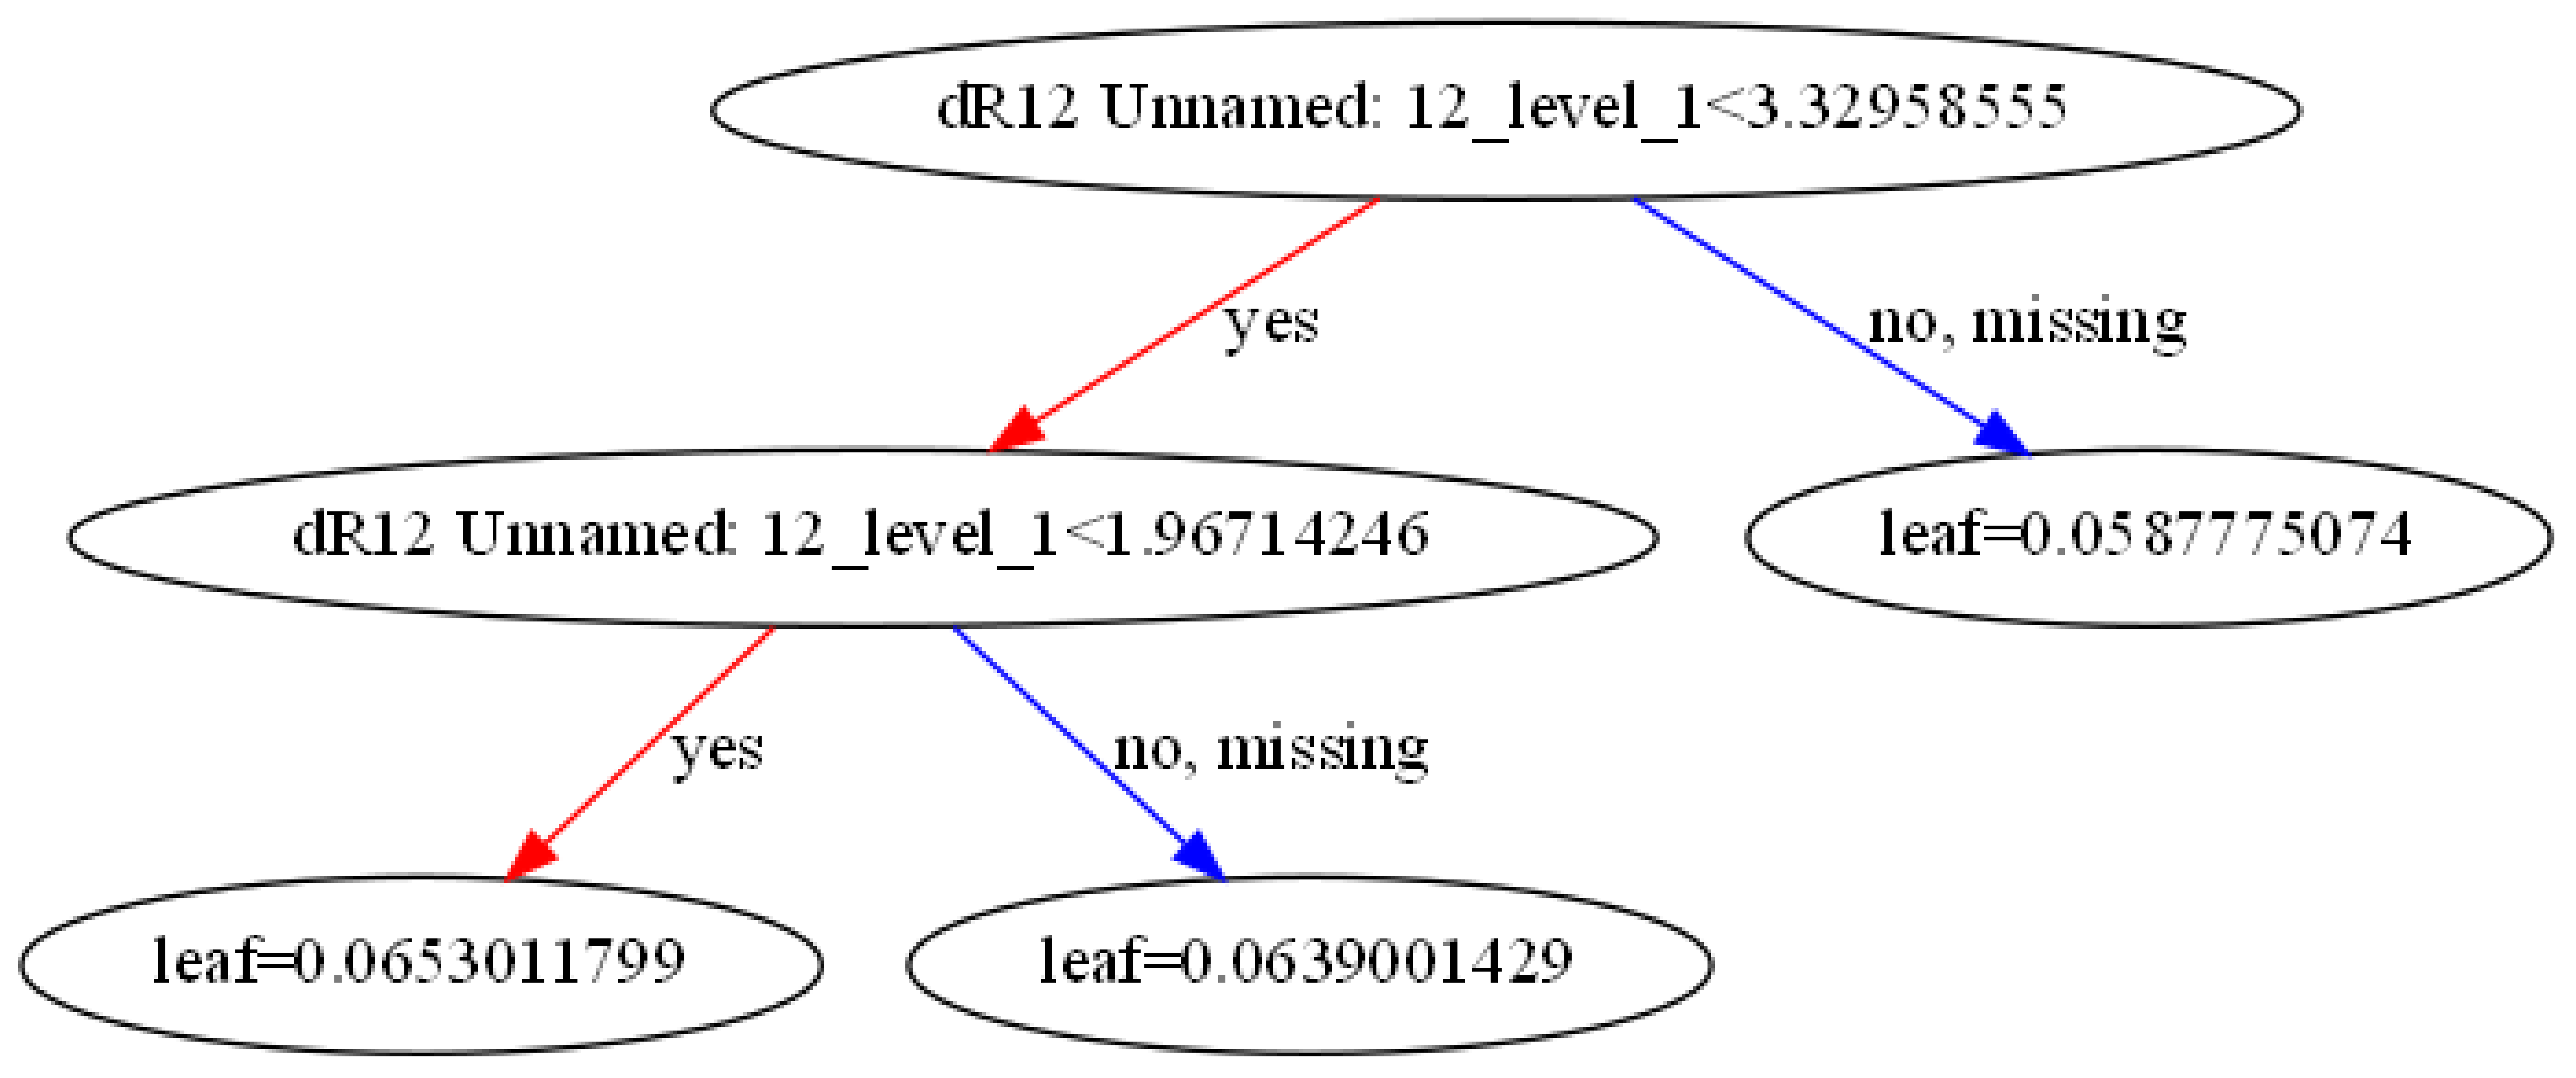

In [89]:
xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

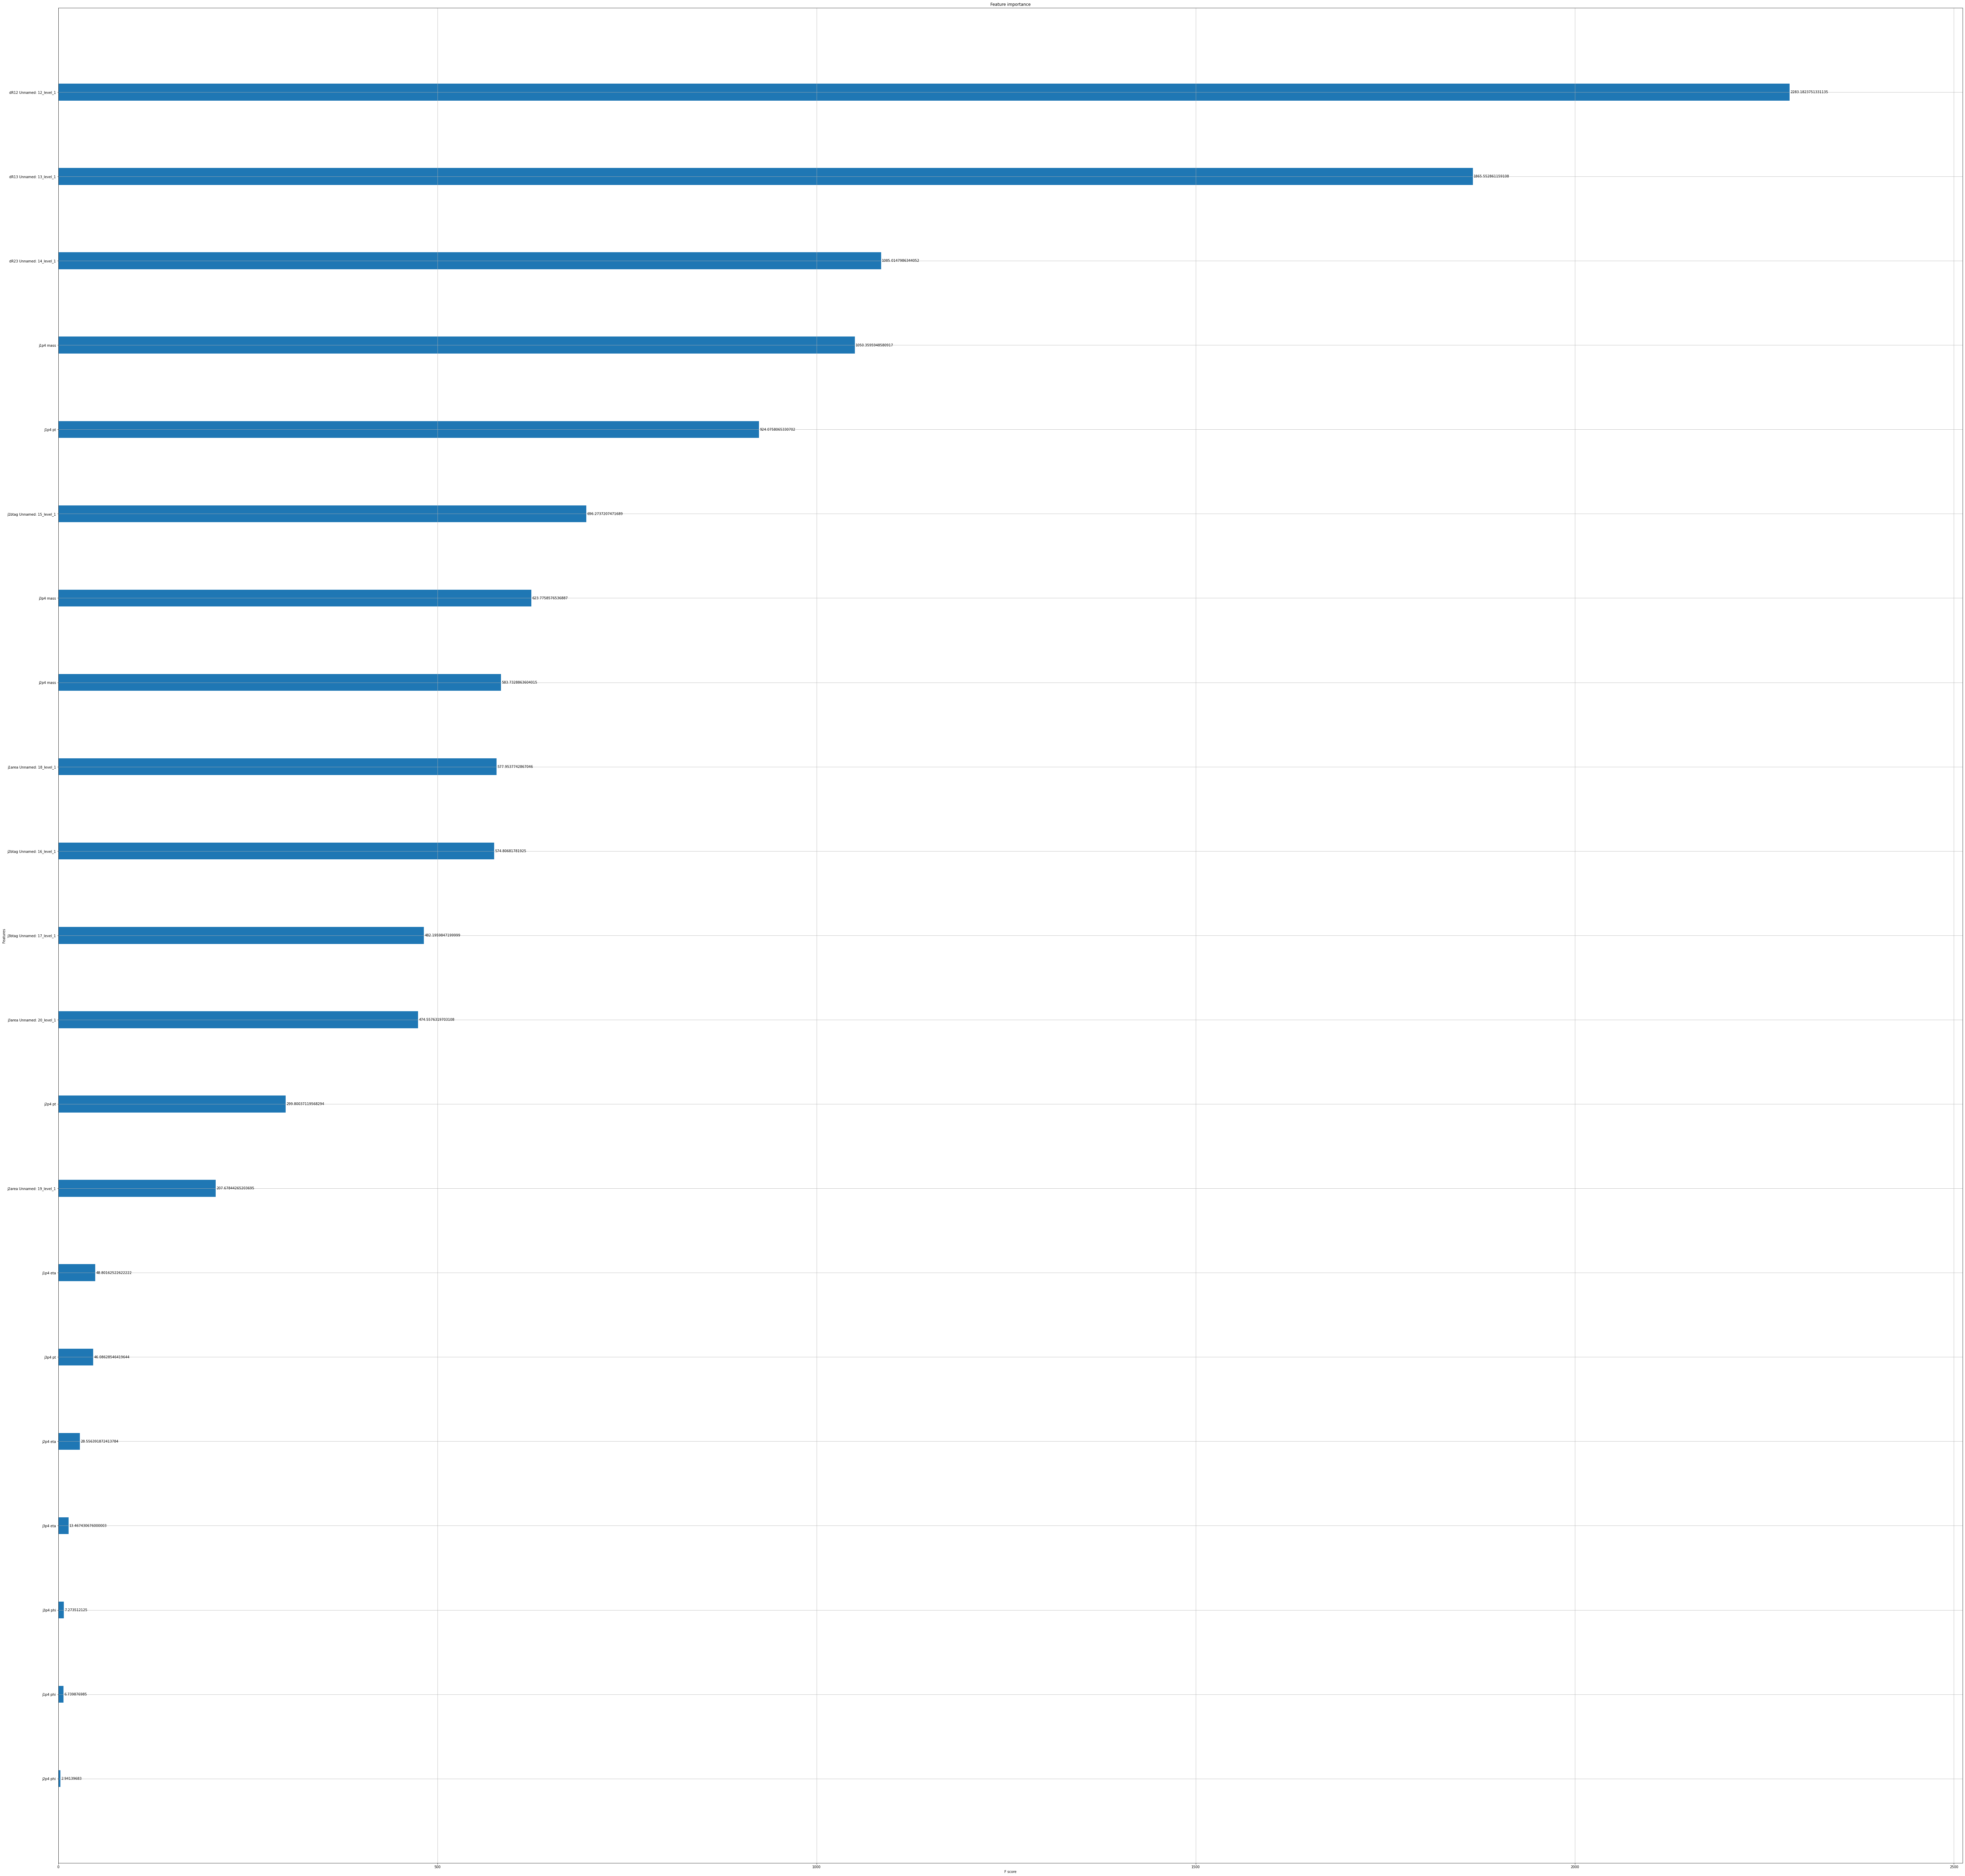

In [90]:
xgb.plot_importance(xg_reg,importance_type='cover')

In [50]:
print(y_test)

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

predictions = xg_reg.predict(X_test)
yt=np.array(y1_test.values).flatten()

ValueError: feature_names mismatch: ['j1p4 pt', 'j1p4 phi', 'j1p4 eta', 'j1p4 mass', 'j2p4 pt', 'j2p4 phi', 'j2p4 eta', 'j2p4 mass', 'j3p4 pt', 'j3p4 phi', 'j3p4 eta', 'j3p4 mass', 'dR12 Unnamed: 12_level_1', 'dR13 Unnamed: 13_level_1', 'dR23 Unnamed: 14_level_1', 'j1btag Unnamed: 15_level_1', 'j2btag Unnamed: 16_level_1', 'j3btag Unnamed: 17_level_1', 'j1area Unnamed: 18_level_1', 'j2area Unnamed: 19_level_1', 'j3area Unnamed: 20_level_1'] ['j1p4 pt', 'j1p4 phi', 'j1p4 eta', 'j1p4 mass', 'j2p4 pt', 'j2p4 phi', 'j2p4 eta', 'j2p4 mass', 'j3p4 pt', 'j3p4 phi', 'j3p4 eta', 'j3p4 mass', 'dR12 Unnamed: 12_level_1', 'dR13 Unnamed: 13_level_1', 'dR23 Unnamed: 14_level_1', 'j1btag Unnamed: 15_level_1', 'j2btag Unnamed: 16_level_1', 'j3btag Unnamed: 17_level_1', 'j1area Unnamed: 18_level_1', 'j2area Unnamed: 19_level_1', 'j3area Unnamed: 20_level_1', 'weight ']
training data did not have the following fields: weight 

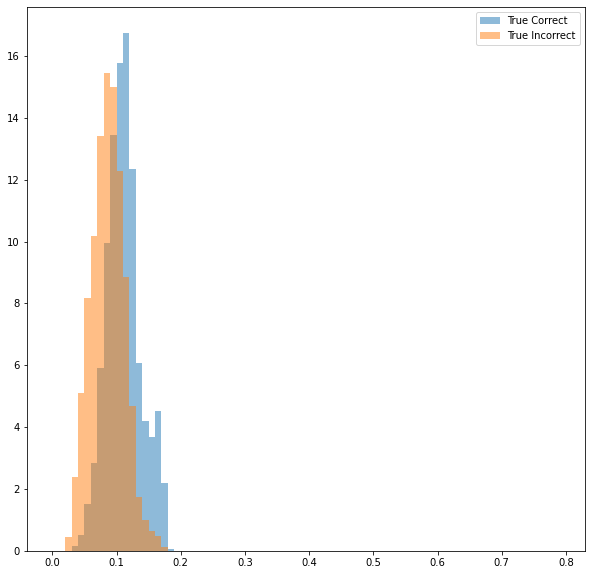

In [62]:
TrueCorrectSets=predictions[yt==1]
TrueIncorrectSets=predictions[yt==0]
bins1=[]
n=0
while n<80:
    bins1.append(n*.01)
    n=n+1
plt.figure(figsize=(10,10))
plt.hist(TrueCorrectSets,bins=bins1,alpha=.5,density=True)
plt.hist(TrueIncorrectSets,bins=bins1,alpha=.5,density=True)
plt.legend(["True Correct","True Incorrect"])

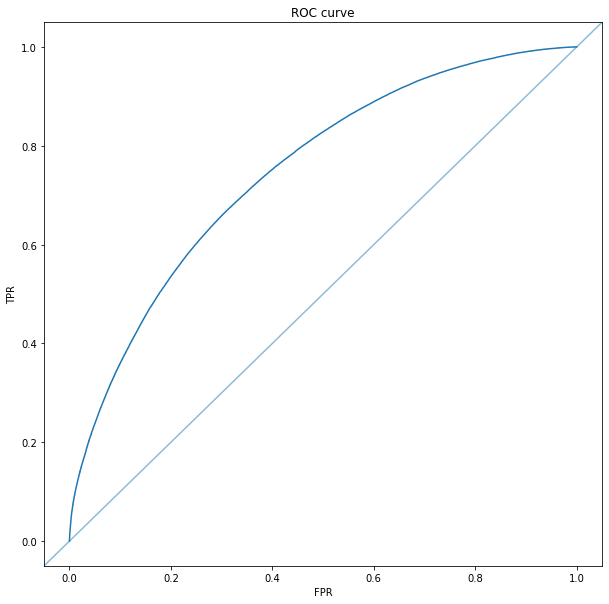

In [74]:
fpr, tpr, _ = roc_curve(yt, predictions)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.axline((0, 0), (1, 1),alpha=.5)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.savefig("ROC_Curve_Validation_Boosted_Decision_Tree.png",format="png")
plt.show()


In [39]:
#ToDo compare probabilities of true good M3 and bad M3

In [20]:
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#pred=[1 if n>=.12 else 0 for n in predictions]
#print(len(predictions[predictions>=1]))
#print(len(yt[yt>=1]))

0
127062


In [21]:
#cm=confusion_matrix(np.array(y1_test.values).flatten(), predictions)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

In [22]:
#disp.plot()

In [23]:
xg_reg.save_model("Total_model.json")

In [24]:
xg_reg.best_ntree_limit

150

In [372]:
dir(xg_reg)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_configure_metrics',
 '_get_feature_info',
 '_set_feature_info',
 '_validate_features',
 'attr',
 'attributes',
 'best_iteration',
 'best_ntree_limit',
 'boost',
 'booster',
 'copy',
 'dump_model',
 'eval',
 'eval_set',
 'feature_names',
 'feature_types',
 'get_dump',
 'get_fscore',
 'get_score',
 'get_split_value_histogram',
 'handle',
 'inplace_predict',
 'load_config',
 'load_model',
 'num_boosted_rounds',
 'num_features',
 'predict',
 'save_config',
 'save_model',
 'save_raw',
 'set_attr',
 'set_param',
 'trees_to_dataframe',
